In [284]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [275]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [276]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing

In [277]:
data.shape

(7920, 3)

In [278]:
data.duplicated().sum()

0

In [279]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

In [185]:
import re
import string

## convert uppercase to lowercase

In [273]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [188]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

## Remove Links

In [190]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x,  flags=re.MULTILINE) for x in x.split()))

In [191]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #pregnancy test #android #apps #...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


## Remove Punchuation

In [193]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [194]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text
data["tweet"] = data["tweet"].apply(remove_punctuations)

In [195]:
data.head(5)

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beaut...
1,2,0,finally a transparant silicon case thanks to ...
2,3,0,we love this would you go talk makememories un...
3,4,0,im wired i know im george i was made that way ...
4,5,1,what amazing service apple wont even talk to m...


In [196]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [197]:
###Remove Numbers

In [198]:
data["tweet"] = data['tweet'].str.replace('/d+', '', regex=True)

## Remove StopWords

In [200]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [201]:
import nltk

In [202]:
nltk.download('stopwords', download_dir='../static./model')

[nltk_data] Downloading package stopwords to ../static./model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [267]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [268]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [205]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [206]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

## Stemming

In [208]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [209]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [210]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [211]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love 90 year old neighbor ipad morn made ...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [212]:
###ML model can't understand letters so we wonna translate this text to nummerical value

## 1st Build Vocabulary

In [214]:
from collections import Counter
vocab = Counter()

In [215]:
vocab

Counter()

In [216]:
for sentence in data['tweet']:
   vocab.update(sentence.split())

In [217]:
vocab

Counter({'iphon': 3725,
         'appl': 2876,
         'samsung': 1387,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 703,
         'rt': 525,
         'ipad': 524,
         'love': 490,
         'like': 452,
         'app': 416,
         'life': 415,
         'day': 414,
         'android': 413,
         'photo': 394,
         'get': 381,
         'instagram': 357,
         'case': 346,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'galaxi': 291,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 264,
         'thank': 263,
         'music': 263,
         'io': 255,
         'time': 247,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [218]:
len(vocab)

16962

In [219]:
data.shape

(7920, 3)

In [220]:
vocab

Counter({'iphon': 3725,
         'appl': 2876,
         'samsung': 1387,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 703,
         'rt': 525,
         'ipad': 524,
         'love': 490,
         'like': 452,
         'app': 416,
         'life': 415,
         'day': 414,
         'android': 413,
         'photo': 394,
         'get': 381,
         'instagram': 357,
         'case': 346,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'galaxi': 291,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 264,
         'thank': 263,
         'music': 263,
         'io': 255,
         'time': 247,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [221]:
tokens = [key for key in vocab if vocab[key] > 10] ###count eka 10ta wata wedi ewa vitharak select kara gamu

len(tokens)

In [223]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

## Divide Dataset

In [225]:
X = data['tweet']
y = data['label']

In [226]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [227]:
###data set eka train and test walta beda gatta train 80%,Test 20%

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [229]:
X_train

6164    hate appl phone wont restart thing restor phon...
5950    report issu receiv iphon replac advisor refus ...
2458    love music music ipodclass ipod appl happi spo...
330     new cellphon case samsung galaxys3 cute case r...
7814    well much psn go back onlin weekend way go son...
                              ...                        
4471    reallyr w photobooth iphon ipad date colleg so...
5007                thank appl realli fix laptop ugh appl
1639    everi time itun updat get confus shouldhavegot...
3215    im readi work macbookpro appl cosi relax night...
4110    morn spongebob chanel globaltv samsung morn ni...
Name: tweet, Length: 6336, dtype: object

In [230]:
X_test

1251    would like wish amaz day make everi minut coun...
5196    ursulaknight chocoladutchess think although it...
6170    brand new imac 27inch 3tb fusion drive doesnt ...
1451    miggiq thank enjoy new ipad case proud pinoy a...
6025    multitask brain media infograph gratitud bless...
                              ...                        
3675    iphon got favorit athlet ever drose wallpap bu...
7228    phone chang even tho im arizona woke hour earl...
1208    icclewu appl relat product probabl good cant s...
1254    order yesterday got alreadi today goodcustomer...
1808    askmeanyth drandrew answer live ask question d...
Name: tweet, Length: 1584, dtype: object

In [231]:
y_train

6164    1
5950    1
2458    0
330     0
7814    1
       ..
4471    0
5007    1
1639    1
3215    0
4110    0
Name: label, Length: 6336, dtype: int64

## Vectorization (text convert to numbers)

In [281]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [234]:
vectorized_x_train = vectorizer(X_train, tokens)

In [235]:
vectorized_x_test = vectorizer(X_test, tokens)

In [236]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [237]:
y_train

6164    1
5950    1
2458    0
330     0
7814    1
       ..
4471    0
5007    1
1639    1
3215    0
4110    0
Name: label, Length: 6336, dtype: int64

In [238]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [239]:
y_test

1251    0
5196    1
6170    1
1451    0
6025    0
       ..
3675    0
7228    1
1208    0
1254    0
1808    0
Name: label, Length: 1584, dtype: int64

In [240]:
y_train.value_counts() ###balance nethi data set ekkada belima

label
0    4744
1    1592
Name: count, dtype: int64

###me data set eka balance nethi nisa balance karamu meka positive comment petthata bara wedi 4724 k tiyana nisa

([<matplotlib.patches.Wedge at 0x243bd9b9fd0>,
 [Text(-0.7747260644922186, 0.780896616074368, 'Positive'),
  Text(0.7747261376050325, -0.780896543539276, 'Negative')])

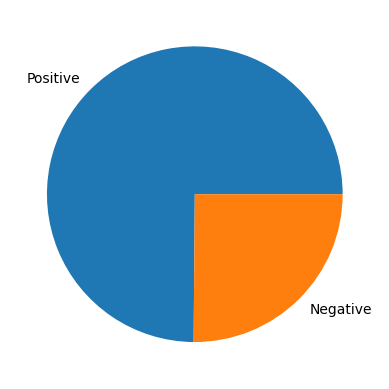

In [242]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])

In [243]:
###Handle imbalance Dataset (using SMOTE technique)

In [244]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [245]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, Y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, Y_train_smote.shape)

(9488, 1192) (9488,)


In [246]:
Y_train_smote.value_counts()

label
1    4744
0    4744
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x243ac7e53d0>,
 [Text(6.735557395310444e-17, 1.1, 'Positive'),
  Text(-2.0206672185931328e-16, -1.1, 'Negative')])

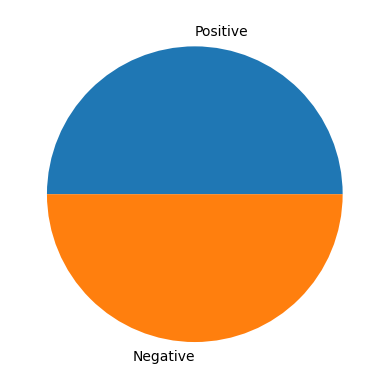

In [247]:
plt.pie(np.array([Y_train_smote.value_counts()[0], Y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])

In [248]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [249]:
Y_train_smote

0       1
1       1
2       0
3       0
4       1
       ..
9483    1
9484    1
9485    1
9486    1
9487    1
Name: label, Length: 9488, dtype: int64

In [250]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [251]:
y_test

1251    0
5196    1
6170    1
1451    0
6025    0
       ..
3675    0
7228    1
1208    0
1254    0
1808    0
Name: label, Length: 1584, dtype: int64

## Model Trainig and Evaluation

In [253]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [254]:
###fuction ekk hada gamu hada ganna model evaluate karanna eke perfomanxe eka thiranaya karanna

In [255]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3) ###method calling
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

## Logistic Regration

In [257]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, Y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(Y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.941
	Precision = 0.915
	Recall = 0.971
	F1-Score = 0.942
Testing Scores:
	Accuracy = 0.879
	Precision = 0.739
	Recall = 0.862
	F1-Score = 0.796


## Naive Bayes

In [259]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, Y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(Y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.904
	Precision = 0.869
	Recall = 0.952
	F1-Score = 0.908
Testing Scores:
	Accuracy = 0.864
	Precision = 0.689
	Recall = 0.919
	F1-Score = 0.788


## Decision  Tree

In [261]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, Y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(Y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.816
	Precision = 0.665
	Recall = 0.664
	F1-Score = 0.664


## Random Forest Classifier

In [263]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, Y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(Y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.854
	Precision = 0.742
	Recall = 0.714
	F1-Score = 0.728


## Support Vector Machine

In [265]:
svm = SVC()
svm.fit(vectorized_x_train_smote, Y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(Y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.978
	Precision = 0.962
	Recall = 0.996
	F1-Score = 0.979
Testing Scores:
	Accuracy = 0.878
	Precision = 0.764
	Recall = 0.804
	F1-Score = 0.783


In [266]:
import pickle

with open('../static/model.pickle', 'wb') as file:
    pickle.dump(lr, file)